In [1]:
from numba import cuda
from matplotlib import pyplot as plt
from math import floor
import numpy as np
import time

In [2]:
if cuda.is_available(): # List devices
    devices = cuda.list_devices()
    print("GPU devices:")
    for device in devices:
        print("-", device.name)
    print("Selected device:", cuda.get_current_device().name)

GPU devices:
- b'NVIDIA GeForce RTX 3060 Laptop GPU'
Selected device: b'NVIDIA GeForce RTX 3060 Laptop GPU'


In [3]:
@cuda.jit # Indicate to Python that this function is a CUDA Kernel
def cudakernel0(array):
    thread_position = cuda.grid(1)
    array[thread_position] += 1

C:\Users\arthu\anaconda3\envs\crypt\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 100 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


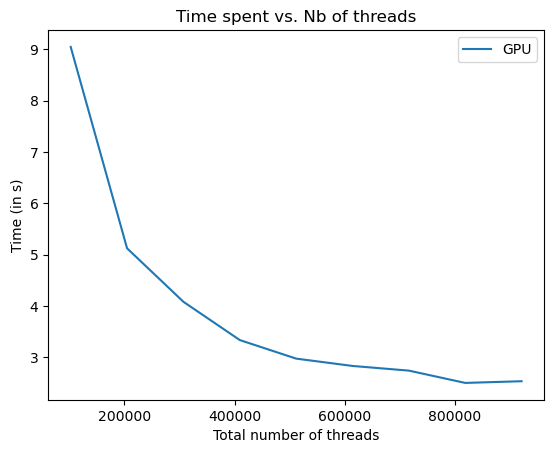

In [29]:
BLOCKSIZE = 1024

operations = np.array([i * 100 for i in range(1, 20)])
size_op = operations.size
times = np.zeros(size_op)

for i in range(size_op):
    GRID_SIZE = operations[i]
    array = np.zeros(GRID_SIZE*BLOCKSIZE, np.float32)

    start = time.time()

    for j in range(int(1000000000 / (GRID_SIZE*BLOCKSIZE))):    
        # GPU
        cudakernel0[GRID_SIZE, BLOCKSIZE](array)
        
    GPU_time = time.time() - start
    times[i] = GPU_time

plt.title("Time spent vs. Nb of threads")
plt.plot(operations * BLOCKSIZE, times, label = 'GPU')
plt.ylabel("Time (in s)")
plt.xlabel("Total number of threads")
plt.legend()
plt.show()